In [1]:
## Importing Libraries

import pandas as pd
import numpy as  np                            
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
## Getting the names of dataset from seaborn library

print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
## Loading Penguin dataset

df = sns.load_dataset('penguins')

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
## Dimension of dataset

df.shape

(344, 7)

In [6]:
## Gives no. of non-nulls and data-types in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
## No. of missing valueas in each columns

df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
## Drop row if it does not have at least three values that are not NaN i.e, drops the row if it has values only in one or two columns

df1=df.dropna(thresh=3) 

In [9]:
## Re-checking the no. of nulls

df1.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [10]:
## Rechecking the dimension of data

df1.shape

(342, 7)

In [11]:
## Finding number of male and female penguin

df1['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [12]:
## Mean weight of male and female penguins

df1[df1.sex=='Male'].body_mass_g.mean(),df1[df1.sex=='Female'].body_mass_g.mean()

(4545.684523809524, 3862.2727272727275)

In [13]:
import warnings
warnings.filterwarnings('ignore')
df1[df1.body_mass_g <= 3862.27]['sex'] = "Female"

In [14]:
df1['sex'] = df1['sex'].fillna("Male")

In [15]:
df1['sex'].value_counts()

Male      177
Female    165
Name: sex, dtype: int64

In [16]:
## Summary statistic for the data

df1.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [17]:
## Coding the categorical columns

from sklearn.preprocessing import LabelEncoder
label_col=df1[['island','sex']].apply(LabelEncoder().fit_transform)

In [18]:
num_col=df1.drop(['species','island','sex'],axis=1)

In [19]:
## Prepared data

df2=pd.concat([label_col,num_col,df1[['species']]],axis=1)
df2.head()

,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,2,1,39.1,18.7,181.0,3750.0,Adelie
1,2,0,39.5,17.4,186.0,3800.0,Adelie
2,2,0,40.3,18.0,195.0,3250.0,Adelie
4,2,0,36.7,19.3,193.0,3450.0,Adelie
5,2,1,39.3,20.6,190.0,3650.0,Adelie


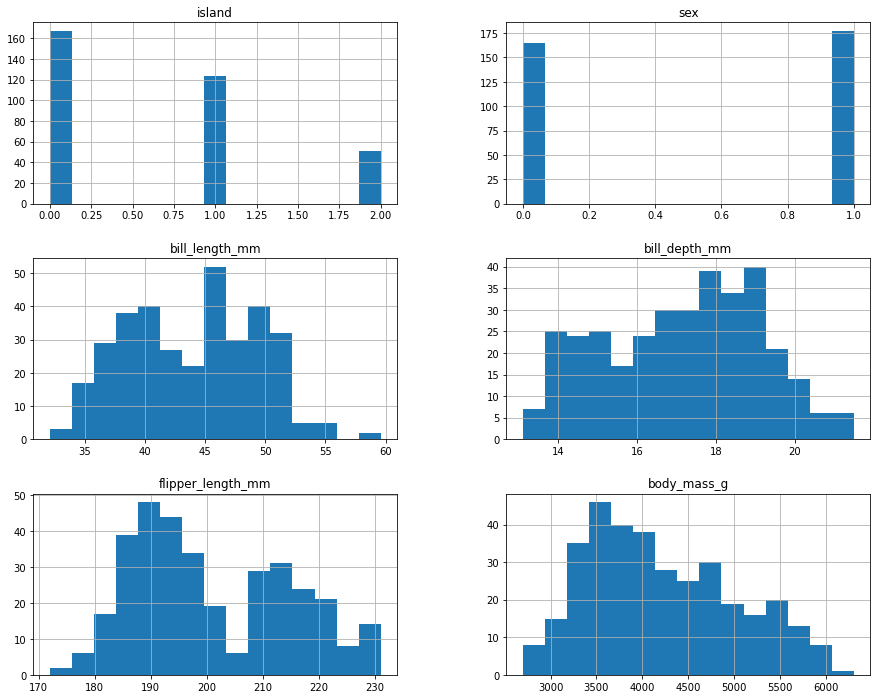

In [20]:
## Distribution of features 

df2.hist(figsize=(15,12),bins = 15)
plt.show()

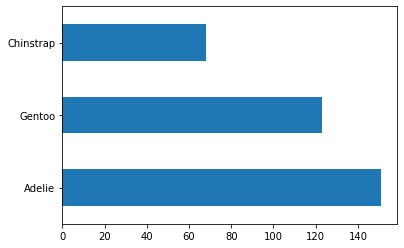

In [21]:
df1['species'].value_counts().plot(kind='barh')
plt.show()

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

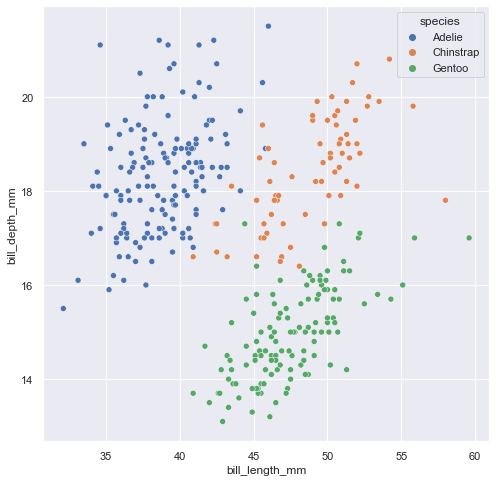

In [23]:
## Scatter plot for bill length and bill width species-wise

sns.set_theme()
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm',data=df1,hue='species')

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

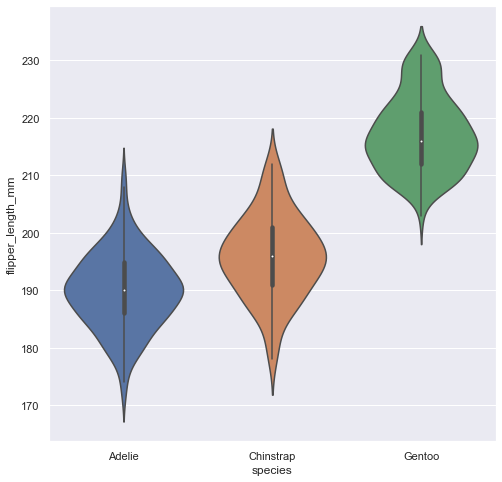

In [24]:
## Voilin Plot for flipper length acccording to species

sns.set_theme()
sns.violinplot(x='species',y='flipper_length_mm',data=df1)

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

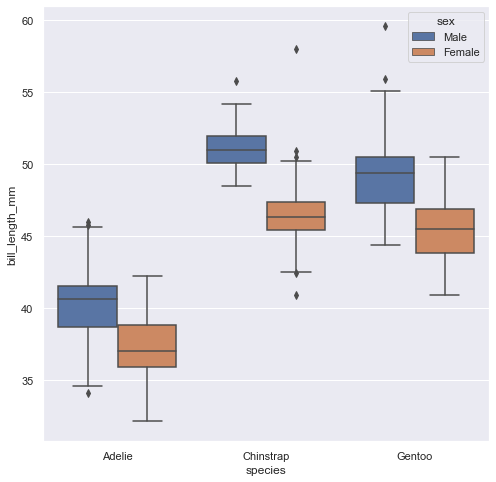

In [25]:
## Boxplot for species and bill length for both male-females.

sns.boxplot(x='species',y='bill_length_mm',hue='sex',data=df1)

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

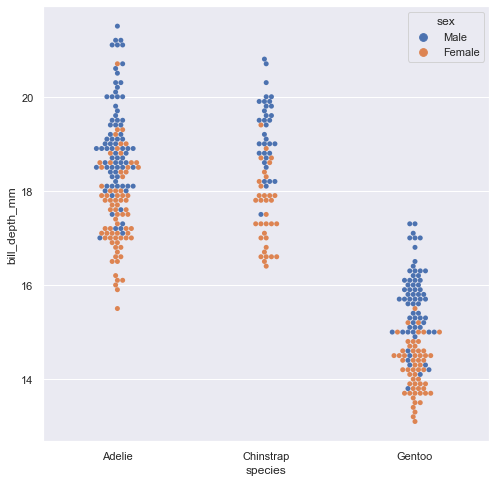

In [26]:
## Swarmplot for species and bill depth for both male-females.

sns.swarmplot(x='species',y='bill_depth_mm',data=df1,hue='sex')

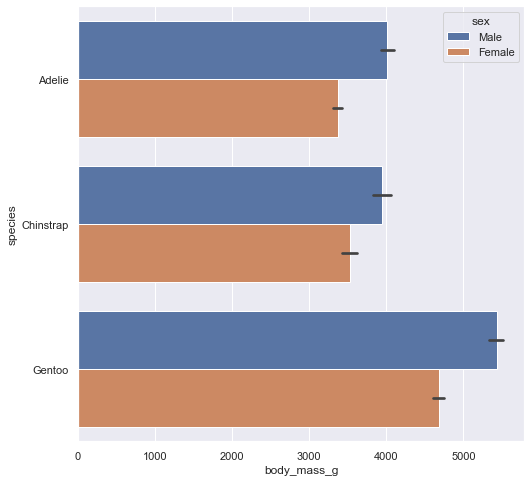

In [27]:
## Barplot for body mass gender wise

sns.barplot(data=df1, x="body_mass_g", y="species", hue="sex")
plt.show()

<AxesSubplot:xlabel='body_mass_g', ylabel='Density'>

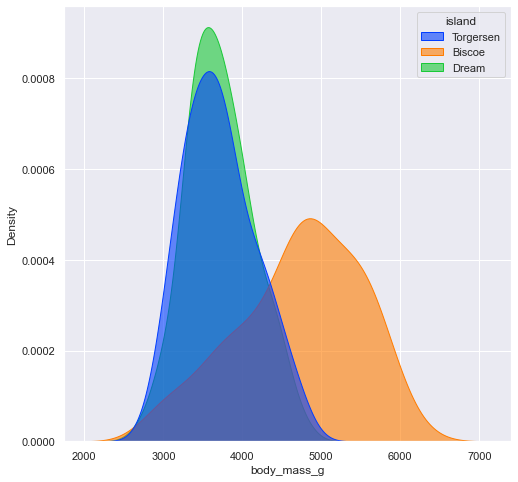

In [28]:
## Density plot for penguins isalnd wise

sns.kdeplot(data=df1, x="body_mass_g", hue="island",
   fill=True,common_norm=False,palette="bright",alpha=.6)

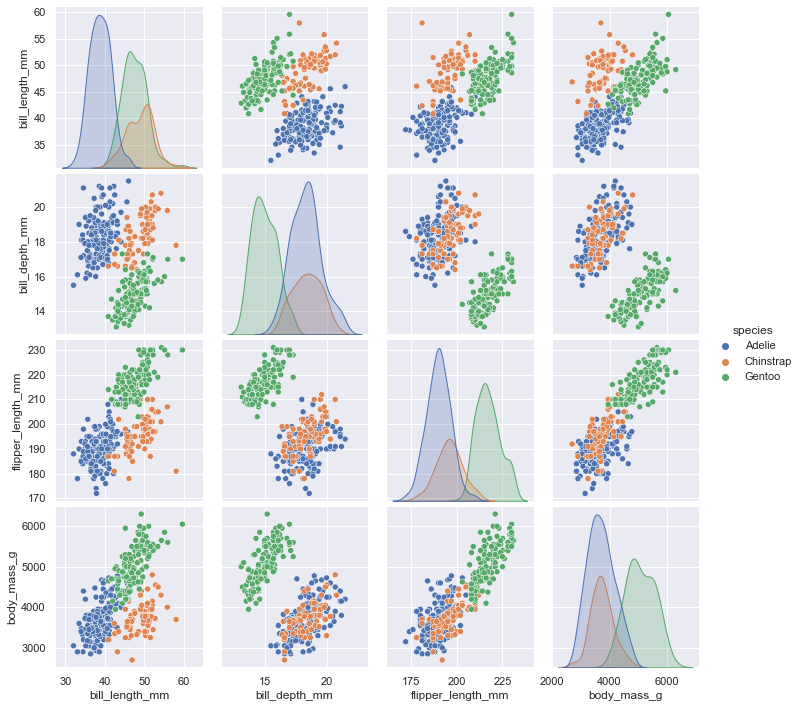

In [29]:
## Pair plot for features

sns.pairplot(df1, hue="species")

In [30]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
features=pd.DataFrame(scale.fit_transform(df2.drop('species',axis=1)),
                  columns=['island','sex','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'])
features.head()

,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,1.85287,0.965507,-0.884499,0.785449,-1.418347,-0.564142
1,1.85287,-1.035725,-0.811126,0.126188,-1.062250,-0.501703
2,1.85287,-1.035725,-0.664380,0.430462,-0.421277,-1.188532
3,1.85287,-1.035725,-1.324737,1.089724,-0.563715,-0.938776
4,1.85287,0.965507,-0.847812,1.748985,-0.777373,-0.689020


In [31]:
target=df2[['species']]
target.head()

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie


In [32]:
## Splitting train and test dataset in 75:25 ratio.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.25,random_state=7)

In [33]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print("Accuracy Score on train set : ",accuracy_score(y_train, dtc.predict(x_train)),"\n")
print("Accuracy Score on test set : ",accuracy_score(y_test, dtc.predict(x_test)),"\n")
print("f1 score on train set : ",f1_score(y_train, dtc.predict(x_train),average='weighted'),"\n")
print("f1 score on test set : ",f1_score(y_test, dtc.predict(x_test),average='weighted'),"\n")

Accuracy Score on train set :  1.0 

Accuracy Score on test set :  0.9534883720930233 

f1 score on train set :  1.0 

f1 score on test set :  0.9530210421457824 



In [34]:
## Random Forest

from sklearn.ensemble import RandomForestClassifier
mod1=RandomForestClassifier()
mod1.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print("Accuracy Score on train set : ",accuracy_score(y_train,mod1.predict(x_train)),"\n")
print("Accuracy Score on test set : ",accuracy_score(y_test,mod1.predict(x_test)),"\n")
print("f1 score on train set : ",f1_score(y_train,mod1.predict(x_train),average='weighted'),"\n")
print("f1 score on test set : ",f1_score(y_test,mod1.predict(x_test),average='weighted'),"\n")

Accuracy Score on train set :  1.0 

Accuracy Score on test set :  0.9767441860465116 

f1 score on train set :  1.0 

f1 score on test set :  0.9762525997352997 



In [35]:
## SVM

from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print("Accuracy Score on train set : ",accuracy_score(y_train,clf.predict(x_train)),"\n")
print("Accuracy Score on test set : ",accuracy_score(y_test,clf.predict(x_test)),"\n")
print("f1 score on train set : ",f1_score(y_train,clf.predict(x_train),average='weighted'),"\n")
print("f1 score on test set : ",f1_score(y_test,clf.predict(x_test),average='weighted'),"\n")


Accuracy Score on train set :  1.0 

Accuracy Score on test set :  0.9767441860465116 

f1 score on train set :  1.0 

f1 score on test set :  0.9762525997352997 



In [36]:
## Knn

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print("Accuracy Score on train set : ",accuracy_score(y_train, knn.predict(x_train)),"\n")
print("Accuracy Score on test set : ",accuracy_score(y_test, knn.predict(x_test)),"\n")
print("f1 score on train set : ",f1_score(y_train, knn.predict(x_train),average='weighted'),"\n")
print("f1 score on test set : ",f1_score(y_test, knn.predict(x_test),average='weighted'),"\n")

Accuracy Score on train set :  1.0 

Accuracy Score on test set :  1.0 

f1 score on train set :  1.0 

f1 score on test set :  1.0 



In [37]:
models = []
models.append(('Decision Tree',accuracy_score(y_train, dtc.predict(x_train)),accuracy_score(y_test, dtc.predict(x_test)),
              f1_score(y_train, dtc.predict(x_train),average='weighted'),f1_score(y_test, dtc.predict(x_test),average='weighted')))

models.append(('Random Forest', accuracy_score(y_train, mod1.predict(x_train)),accuracy_score(y_test, mod1.predict(x_test)),
              f1_score(y_train, mod1.predict(x_train),average='weighted'),f1_score(y_test, mod1.predict(x_test),average='weighted')))

models.append(('SVM', accuracy_score(y_train, clf.predict(x_train)),accuracy_score(y_test, clf.predict(x_test)),
              f1_score(y_train, clf.predict(x_train),average='weighted'),f1_score(y_test, clf.predict(x_test),average='weighted')))

models.append(('KNN', accuracy_score(y_train, knn.predict(x_train)),accuracy_score(y_test, knn.predict(x_test)),
              f1_score(y_train, knn.predict(x_train),average='weighted'),f1_score(y_test, knn.predict(x_test),average='weighted')))

table=pd.DataFrame(models)
table.columns=['Method','Acc_train','Acc_test','f1_train','f1_test']
table

,Method,Acc_train,Acc_test,f1_train,f1_test
0,Decision Tree,1.0,0.953488,1.0,0.953021
1,Random Forest,1.0,0.976744,1.0,0.976253
2,SVM,1.0,0.976744,1.0,0.976253
3,KNN,1.0,1.000000,1.0,1.000000
